In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

In [6]:
df_feat = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df_feat.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df_target = pd.DataFrame(digits['target'],columns=['Digits'])
df_target.head()

,Digits
0,0
1,1
2,2
3,3
4,4


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_target)
scaled_features = scaler.transform(df_target)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  2  0  0  0  0  0  0 43  1]
 [ 0  0  0  2  0  0  0  0  1 60]]


In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        54
           3       0.96      1.00      0.98        52
           4       1.00      1.00      1.00        62
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        49
           8       0.98      0.93      0.96        46
           9       0.97      0.95      0.96        63

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [14]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

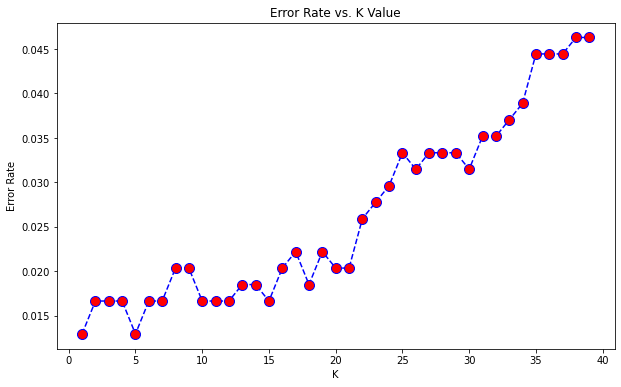

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[50  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  2  0  0  0  0  0  0 43  1]
 [ 0  0  0  2  0  0  0  0  1 60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        54
           3       0.96      1.00      0.98        52
           4       1.00      1.00      1.00        62
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        49
           8       0.98      0.93      0.96        46
           9       0.97      0.95      0.96        63

    accuracy                           0.99       540
   mac

In [17]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[50  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  1  0  0  0]
 [ 0  0 53  0  0  0  0  0  1  0]
 [ 0  0  0 50  0  0  0  2  0  0]
 [ 0  0  0  0 60  0  0  1  1  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  5  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.98      0.95        56
           2       1.00      0.98      0.99        54
           3       0.98      0.96      0.97        52
           4       1.00      0.97      0.98        62
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        53
           7       0.92      1.00      0.96        49
           8       0.95      0.89      0.92        46
           9       0.98      0.95      0.97        63

    accuracy                           0.97       540
   ma